In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
train_df = pd.read_csv('data/train.csv')
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
test_df = pd.read_csv('data/test.csv')
test_df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [4]:
train_df.shape, test_df.shape

((891, 12), (418, 11))

In [5]:
# check nan values
all_df = [train_df, test_df]
nan_count = [train_nan_count, test_nan_count] = [col.isna().sum() for col in all_df]
nan_pct = [train_nan_pct, test_nan_pct] = [round(count / len(all_df) * 100, 2) for count, all_df in zip(nan_count, all_df)]

order = [train_nan_count, train_nan_pct, test_nan_count, test_nan_pct]
order_key = ['Train NaN', 'Percentage', 'Test NaN', 'Percentage']
pd.concat(order, axis=1, keys=order_key, sort=True)

,Train NaN,Percentage,Test NaN,Percentage
Age,177,19.87,86.0,20.57
Cabin,687,77.10,327.0,78.23
Embarked,2,0.22,0.0,0.00
Fare,0,0.00,1.0,0.24
Name,0,0.00,0.0,0.00
Parch,0,0.00,0.0,0.00
PassengerId,0,0.00,0.0,0.00
Pclass,0,0.00,0.0,0.00
Sex,0,0.00,0.0,0.00
SibSp,0,0.00,0.0,0.00


In [6]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [7]:
train_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [8]:
train_df.describe(include=['O'])

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Trout, Mrs. William H (Jessie L)",male,347082,G6,S
freq,1,577,7,4,644


## Analyze by Pivoting Features

To confirm some of our observations and assumptions, we can quickly analyze our feature correlations by pivoting features against each other. We can only do so at this stage for features which do not have any empty values. It also makes sense doing so only for features which are categorical (Sex), ordinal (Pclass) or discrete (SibSp, Parch) type.

In [9]:
train_df[['Pclass', 'Survived']].groupby(['Pclass'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


In [10]:
train_df[['Sex', 'Survived']].groupby(['Sex'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Sex,Survived
0,female,0.742038
1,male,0.188908


In [11]:
train_df[['SibSp', 'Survived']].groupby(['SibSp'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,SibSp,Survived
1,1,0.535885
2,2,0.464286
0,0,0.345395
3,3,0.250000
4,4,0.166667
5,5,0.000000
6,8,0.000000


In [12]:
train_df[['Parch', 'Survived']].groupby(['Parch'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Parch,Survived
3,3,0.600000
1,1,0.550847
2,2,0.500000
0,0,0.343658
5,5,0.200000
4,4,0.000000
6,6,0.000000


__Observations:__

* There's a significant correlation (> 0.5) among Pclass=1 and Survived.
* Sex=female had very high survival rate at 74%
* Features: SibSp and Parch have zero correlation with certain values. Perhaps we can try to derive a feature or a set of features from these individual features.

## Analyze by Visualizing Data

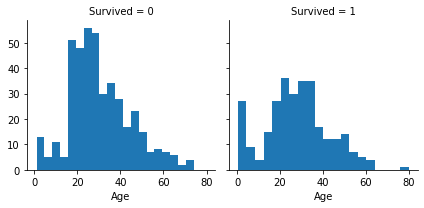

In [13]:
# check correlation between age and survived
g = sns.FacetGrid(train_df, col='Survived')
g.map(plt.hist, 'Age', bins=20)

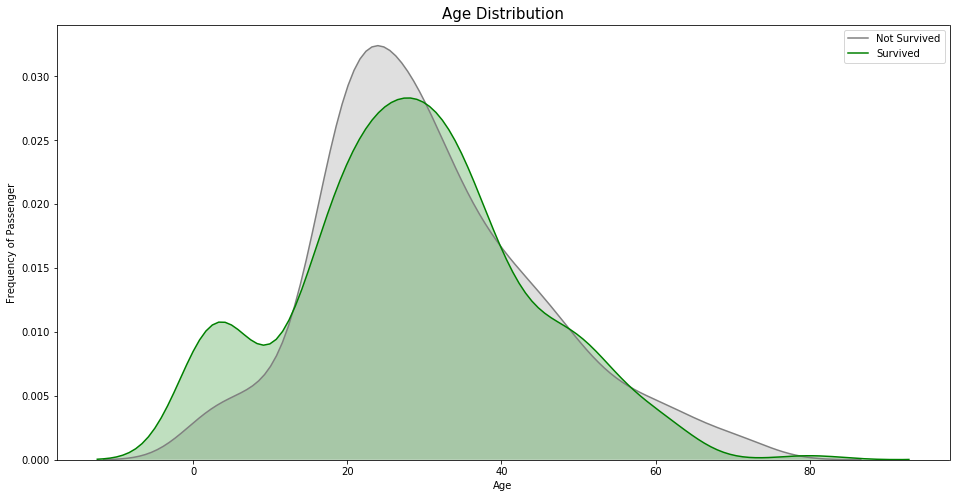

In [15]:
fig = plt.figure(figsize=(16,8))

ax = sns.kdeplot(train_df[train_df.Survived == 0]['Age'], color='gray', shade='True', label='Not Survived')
ax = sns.kdeplot(train_df[train_df.Survived == 1]['Age'], color='g', shade='True', label='Survived')
ax.set_title('Age Distribution', fontsize=15)
ax.set_xlabel('Age', fontsize=10)
ax.set_ylabel('Frequency of Passenger', fontsize=10)
plt.show()

__Observations:__

* Infants (Age <= 4) had high survival rate
* Oldest passengers (Age = 80) survived
* Large number of 15 - 25 years old did not survive
* Most passengers are 15 - 35 years old

__Decisions:__

* Consider feature "Age" in model training
* Handle "Age" null values
* Band "Age" groups

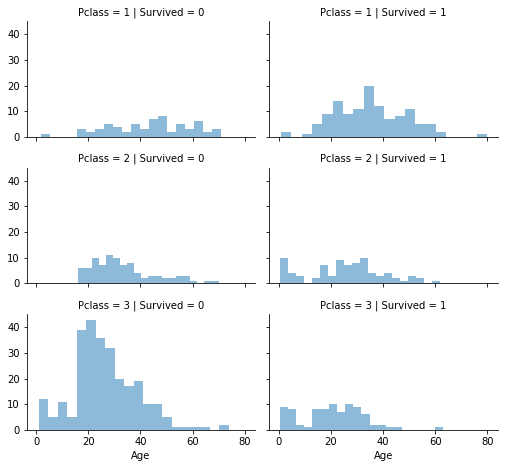

In [16]:
# check correlation between pclass and survived
grid = sns.FacetGrid(train_df, col='Survived', row='Pclass', height=2.2, aspect=1.6)
grid.map(plt.hist, 'Age', alpha=0.5, bins=20)
grid.add_legend()

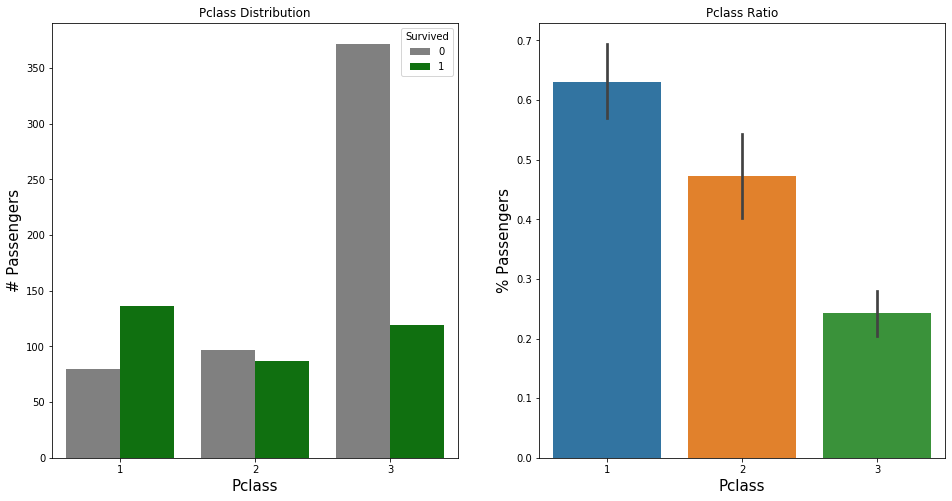

In [17]:
fig, axes = plt.subplots(1, 2, figsize=(16,8))

pal = {0:'gray', 1:'green'}
ax = sns.countplot(x='Pclass', hue='Survived', data=train_df, palette=pal, ax=axes[0])
ax.set_title('Pclass Distribution')
ax.set_xlabel('Pclass', fontsize=15)
ax.set_ylabel('# Passengers', fontsize=15)

ax = sns.barplot(x='Pclass', y='Survived', data=train_df, ax=axes[1])
ax.set_title('Pclass Ratio')
ax.set_xlabel('Pclass', fontsize=15)
ax.set_ylabel('% Passengers', fontsize=15)

plt.show()

__Observations:__
* Pclass=3 had the most passengers, however most did not survive.
* Infant passengers in Pclass=2 and Pclass=3 mostly survived.
* Most passenger in Pclass=1 survived
* Pclass varied in terms of Age distribution of passengers.

__Decisions:__
* Include "Pclass" in model training

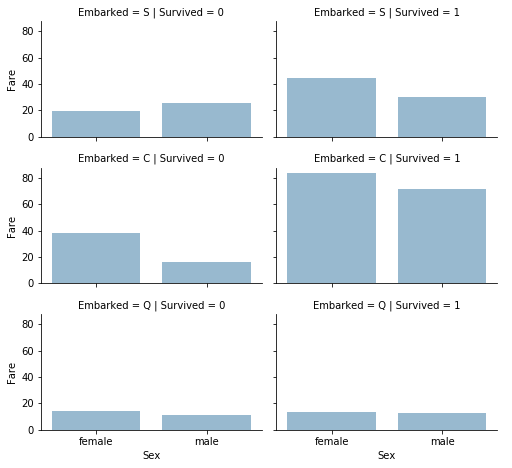

In [19]:
grid = sns.FacetGrid(train_df, row='Embarked', col='Survived', height=2.2, aspect=1.6)
grid.map(sns.barplot, 'Sex', 'Fare', alpha=.5, ci=None)
grid.add_legend()

__Observations:__
* Pork of Embarkation correlates with survival rates.
* Higher fare paying passenger had better survival.

__Decisions:__
* Consider 'Embarked' for model training (need to handle the missing data)
* Consider banding 'Fare'

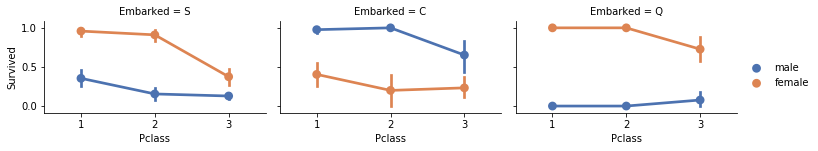

In [21]:
grid = sns.FacetGrid(train_df, col='Embarked', height=2.2, aspect=1.6)
grid.map(sns.pointplot, 'Pclass', 'Survived', 'Sex', palette='deep')
grid.add_legend()

__Note:__
* Consider to drop "Ticket" because of high ratio of duplicates (unique: 681 out of 891 total in train_df)
* We will try to include "Cabin" in our model and handle the missing values.

## Wrangle the Data

In [22]:
# Drop data
train_mod_df = train_df.drop(['Ticket'], axis=1)
test_mod_df = test_df.drop(['Ticket'], axis=1)

### Converting 'Sex' Categorical feature

In [23]:
for df in [train_mod_df, test_mod_df]:
    df['Sex'] = df['Sex'].map({'male': 1, 'female':0})

In [24]:
train_mod_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,8.0500,NaN,S


### Create new feature family size which combines SibSp and Parch

In [25]:
for df in [train_mod_df, test_mod_df]:
    df['FamilySize'] = df['SibSp'] + df['Parch'] + 1 # added +1 to count for itself

train_mod_df[['FamilySize', 'Survived']].groupby(['FamilySize'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,FamilySize,Survived
3,4,0.724138
2,3,0.578431
1,2,0.552795
6,7,0.333333
0,1,0.303538
4,5,0.200000
5,6,0.136364
7,8,0.000000
8,11,0.000000


In [26]:
for df in [train_mod_df, test_mod_df]:
    df['IsAlone'] = 0
    df.loc[df['FamilySize']==1, 'IsAlone'] = 1

train_mod_df[['FamilySize','IsAlone']].head()

,FamilySize,IsAlone
0,2,0
1,2,0
2,1,1
3,2,0
4,1,1


In [27]:
train_mod_df.drop(['Parch','SibSp','FamilySize'], axis=1, inplace=True)
test_mod_df.drop(['Parch','SibSp','FamilySize'], axis=1, inplace=True)

train_mod_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,Fare,Cabin,Embarked,IsAlone
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,7.2500,NaN,S,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,71.2833,C85,C,0
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,7.9250,NaN,S,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,53.1000,C123,S,0
4,5,0,3,"Allen, Mr. William Henry",1,35.0,8.0500,NaN,S,1


### Analyze Name Feature

We want to check if Name feature can be engineered to extract titles and test the correlation between titles and survival.

In [28]:
# Extract title from Name feature
for df in [train_mod_df, test_mod_df]:
    df['Title'] = df.Name.str.extract(' ([A-Za-z]+)\.', expand=False)

In [29]:
pd.crosstab(train_mod_df.Title, train_mod_df.Sex)

Sex,0,1
Title,,
Capt,0,1
Col,0,2
Countess,1,0
Don,0,1
Dr,1,6
Jonkheer,0,1
Lady,1,0
Major,0,2
Master,0,40


In [30]:
# Replace some of the uncommon titles as 'Rare'
for df in [train_mod_df, test_mod_df]:
    df['Title'] = df['Title'].replace(
        ['Lady', 'Countess', 'Capt', 'Col', 'Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')
    df['Title'] = df['Title'].replace('Mlle', 'Miss')
    df['Title'] = df['Title'].replace('Ms', 'Miss')
    df['Title'] = df['Title'].replace('Mme', 'Mrs')

In [31]:
train_mod_df[['Title', 'Survived']].groupby(['Title'], as_index=False).mean()

,Title,Survived
0,Master,0.575000
1,Miss,0.702703
2,Mr,0.156673
3,Mrs,0.793651
4,Rare,0.347826


In [32]:
# Drop Name feature
train_mod_df.drop(['Name'], axis=1, inplace=True)
test_mod_df.drop(['Name'], axis=1, inplace=True)

train_mod_df.head()

,PassengerId,Survived,Pclass,Sex,Age,Fare,Cabin,Embarked,IsAlone,Title
0,1,0,3,1,22.0,7.2500,NaN,S,0,Mr
1,2,1,1,0,38.0,71.2833,C85,C,0,Mrs
2,3,1,3,0,26.0,7.9250,NaN,S,1,Miss
3,4,1,1,0,35.0,53.1000,C123,S,0,Mrs
4,5,0,3,1,35.0,8.0500,NaN,S,1,Mr


In [33]:
test_mod_df.groupby('Title').count()

,PassengerId,Pclass,Sex,Age,Fare,Cabin,Embarked,IsAlone
Title,,,,,,,,
Master,21,21,21,17,21,2,21,21
Miss,79,79,79,64,79,11,79,79
Mr,240,240,240,183,239,42,240,240
Mrs,72,72,72,62,72,32,72,72
Rare,6,6,6,6,6,4,6,6


### Handling 'Age' Feature

We will fill 'Age' feature's missing value by using median values for 'Age' across set of 'Pclas' and 'Sex' feature combination 

In [34]:
guess_ages = np.zeros((2,3))
guess_ages

array([[0., 0., 0.],
       [0., 0., 0.]])

In [35]:
for df in [train_mod_df, test_mod_df]:
    for i in range(0,2): # iterate over Sex
        for j in range(0,3): # iterate over Pclass
            age_df = df[(df['Sex']==i) & (df['Pclass']==j+1)]['Age'].dropna()
            median_age = age_df.median()
            # convert median age to nearest .5 age
            guess_ages[i,j] = int(median_age/0.5 + 0.5) * 0.5
    
    for i in range(0,2):
        for j in range(0,3):
            df.loc[(df['Age'].isnull()) & (df['Sex']==i) & (df['Pclass']==j+1), 'Age'] = guess_ages[i,j]
    
    df['Age'] = df['Age'].astype(int)

In [36]:
test_mod_df.Age.isna().any()

False

In [37]:
guess_ages

array([[41., 24., 22.],
       [42., 28., 24.]])

Create Age Bands

In [38]:
train_mod_df['AgeBand'] = pd.cut(train_mod_df['Age'], 5)

In [39]:
train_mod_df[['AgeBand','Survived']].groupby(['AgeBand'], as_index=False).mean().sort_values(by='AgeBand', ascending=True)

,AgeBand,Survived
0,"(-0.08, 16.0]",0.550000
1,"(16.0, 32.0]",0.337374
2,"(32.0, 48.0]",0.412037
3,"(48.0, 64.0]",0.434783
4,"(64.0, 80.0]",0.090909


Replace Age with ordinal values based on the bands

In [40]:
for df in [train_mod_df, test_mod_df]:
    df.loc[df['Age'] <= 16, 'Age'] = 0
    df.loc[(df['Age'] > 16) & (df['Age'] <= 32), 'Age'] = 1
    df.loc[(df['Age'] > 32) & (df['Age'] <= 48), 'Age'] = 2
    df.loc[(df['Age'] > 48) & (df['Age'] <= 64), 'Age'] = 3
    df.loc[(df['Age'] > 64), 'Age'] = 4
    
train_mod_df.head()

,PassengerId,Survived,Pclass,Sex,Age,Fare,Cabin,Embarked,IsAlone,Title,AgeBand
0,1,0,3,1,1,7.2500,NaN,S,0,Mr,"(16.0, 32.0]"
1,2,1,1,0,2,71.2833,C85,C,0,Mrs,"(32.0, 48.0]"
2,3,1,3,0,1,7.9250,NaN,S,1,Miss,"(16.0, 32.0]"
3,4,1,1,0,2,53.1000,C123,S,0,Mrs,"(32.0, 48.0]"
4,5,0,3,1,2,8.0500,NaN,S,1,Mr,"(32.0, 48.0]"


In [41]:
train_mod_df.drop(['AgeBand'], axis=1, inplace=True)
train_mod_df.head()

,PassengerId,Survived,Pclass,Sex,Age,Fare,Cabin,Embarked,IsAlone,Title
0,1,0,3,1,1,7.2500,NaN,S,0,Mr
1,2,1,1,0,2,71.2833,C85,C,0,Mrs
2,3,1,3,0,1,7.9250,NaN,S,1,Miss
3,4,1,1,0,2,53.1000,C123,S,0,Mrs
4,5,0,3,1,2,8.0500,NaN,S,1,Mr


### Handling 'Embarked' Feature

We will fill the missing 'Embarked' value with the most common occurence of it.

In [42]:
embarked_most = train_mod_df.Embarked.dropna().mode()[0]
embarked_most

'S'

In [43]:
for df in [train_mod_df, test_mod_df]:
    df['Embarked'] = df['Embarked'].fillna(embarked_most)
    
train_mod_df[['Embarked', 'Survived']].groupby(['Embarked'], as_index=False).mean().sort_values(by='Embarked', ascending=False)

,Embarked,Survived
2,S,0.339009
1,Q,0.389610
0,C,0.553571


### Handling 'Fare' Feature

In [44]:
test_mod_df.Fare.isna().sum()

1

In [45]:
# fill the missing test 'Fare' feature with the median value
test_mod_df['Fare'].fillna(test_mod_df['Fare'].dropna().median(), inplace=True)

In [46]:
# Create Fare Band
train_mod_df['FareBand'] = pd.qcut(train_mod_df['Fare'], 4)

train_mod_df[['FareBand', 'Survived']].groupby(['FareBand'], as_index=False).mean().sort_values(by='FareBand', ascending=True)

,FareBand,Survived
0,"(-0.001, 7.91]",0.197309
1,"(7.91, 14.454]",0.303571
2,"(14.454, 31.0]",0.454955
3,"(31.0, 512.329]",0.581081


In [47]:
# Convert Fate feature value based on the FareBand
for df in [train_mod_df, test_mod_df]:
    df.loc[(df['Fare'] <= 7.91), 'Fare'] = 0
    df.loc[(df['Fare'] > 7.91) & (df['Fare'] <= 14.454), 'Fare'] = 1
    df.loc[(df['Fare'] > 14.454) & (df['Fare'] <= 31.0), 'Fare'] = 2
    df.loc[(df['Fare'] > 31.0), 'Fare'] = 3
    df['Fare'] = df['Fare'].astype(int)

train_mod_df.head()

,PassengerId,Survived,Pclass,Sex,Age,Fare,Cabin,Embarked,IsAlone,Title,FareBand
0,1,0,3,1,1,0,NaN,S,0,Mr,"(-0.001, 7.91]"
1,2,1,1,0,2,3,C85,C,0,Mrs,"(31.0, 512.329]"
2,3,1,3,0,1,1,NaN,S,1,Miss,"(7.91, 14.454]"
3,4,1,1,0,2,3,C123,S,0,Mrs,"(31.0, 512.329]"
4,5,0,3,1,2,1,NaN,S,1,Mr,"(7.91, 14.454]"


In [48]:
train_mod_df.drop(['FareBand'], axis=1, inplace=True)

train_mod_df.head()

,PassengerId,Survived,Pclass,Sex,Age,Fare,Cabin,Embarked,IsAlone,Title
0,1,0,3,1,1,0,NaN,S,0,Mr
1,2,1,1,0,2,3,C85,C,0,Mrs
2,3,1,3,0,1,1,NaN,S,1,Miss
3,4,1,1,0,2,3,C123,S,0,Mrs
4,5,0,3,1,2,1,NaN,S,1,Mr


### Handling 'Cabin' Features

In [49]:
train_mod_df.groupby('Cabin').count()

,PassengerId,Survived,Pclass,Sex,Age,Fare,Embarked,IsAlone,Title
Cabin,,,,,,,,,
A10,1,1,1,1,1,1,1,1,1
A14,1,1,1,1,1,1,1,1,1
A16,1,1,1,1,1,1,1,1,1
A19,1,1,1,1,1,1,1,1,1
A20,1,1,1,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...
F33,3,3,3,3,3,3,3,3,3
F38,1,1,1,1,1,1,1,1,1
F4,2,2,2,2,2,2,2,2,2


In [52]:
# Convert Cabin to the first letter only, including nan
for df in [train_mod_df, test_mod_df]:
    df['Cabin'] = df['Cabin'].copy().astype(str).str[0]

train_mod_df.groupby('Cabin', as_index=False).count()

,Cabin,PassengerId,Survived,Pclass,Sex,Age,Fare,Embarked,IsAlone,Title
0,A,15,15,15,15,15,15,15,15,15
1,B,47,47,47,47,47,47,47,47,47
2,C,59,59,59,59,59,59,59,59,59
3,D,33,33,33,33,33,33,33,33,33
4,E,32,32,32,32,32,32,32,32,32
5,F,13,13,13,13,13,13,13,13,13
6,G,4,4,4,4,4,4,4,4,4
7,T,1,1,1,1,1,1,1,1,1
8,n,687,687,687,687,687,687,687,687,687


In [53]:
test_mod_df.groupby('Cabin', as_index=False).count().sort_values('Cabin')

,Cabin,PassengerId,Pclass,Sex,Age,Fare,Embarked,IsAlone,Title
0,A,7,7,7,7,7,7,7,7
1,B,18,18,18,18,18,18,18,18
2,C,35,35,35,35,35,35,35,35
3,D,13,13,13,13,13,13,13,13
4,E,9,9,9,9,9,9,9,9
5,F,8,8,8,8,8,8,8,8
6,G,1,1,1,1,1,1,1,1
7,n,327,327,327,327,327,327,327,327


In [54]:
# drop cabin 'T' in train_mod_df as test_mod_df does not have cabin value 'T'
train_mod_df = train_mod_df[train_mod_df.Cabin != 'T'].copy()

In [55]:
# Create a new feature 'HasCabin'
for df in [train_mod_df, test_mod_df]:
    df.loc[:,'HasCabin'] = 1
    df.loc[df['Cabin'] == 'n', 'HasCabin'] = 0

In [56]:
# drop 'Cabin' Feature
train_mod_df.drop('Cabin', axis=1, inplace=True)
test_mod_df.drop('Cabin', axis=1, inplace=True)

### One Hode Encode

In [58]:
ohe_col = ['Embarked', 'Title']
train_mod_df = pd.get_dummies(train_mod_df, columns=ohe_col, drop_first=True)
test_mod_df = pd.get_dummies(test_mod_df, columns=ohe_col, drop_first=True)

In [59]:
train_mod_df.head()

,PassengerId,Survived,Pclass,Sex,Age,Fare,IsAlone,HasCabin,Embarked_Q,Embarked_S,Title_Miss,Title_Mr,Title_Mrs,Title_Rare
0,1,0,3,1,1,0,0,0,0,1,0,1,0,0
1,2,1,1,0,2,3,0,1,0,0,0,0,1,0
2,3,1,3,0,1,1,1,0,0,1,1,0,0,0
3,4,1,1,0,2,3,0,1,0,1,0,0,1,0
4,5,0,3,1,2,1,1,0,0,1,0,1,0,0


## Model, Predict and Solve

In [60]:
X = train_mod_df.drop(['PassengerId','Survived'], axis=1)
y = train_mod_df.Survived
X_predict = test_mod_df.drop('PassengerId', axis=1).copy()

X.shape, y.shape, X_predict.shape

((890, 12), (890,), (418, 12))

In [61]:
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.linear_model import LogisticRegression, Perceptron, SGDClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier

In [62]:
seed = 8
test_size = 0.2
fold = 10
metric = "accuracy"

In [63]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=seed)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((712, 12), (178, 12), (712,), (178,))

In [64]:
# hold different classifier models in single dictionary
models = {}
models['LogisticRegression'] = LogisticRegression(solver='lbfgs')
models['Perceptron'] = Perceptron()
models['SGDClassifier'] = SGDClassifier()
models['SVC'] = SVC(gamma='auto')
models['GradientBoostingClassifier'] = GradientBoostingClassifier(n_estimators=100)
models['RandomForestClassifier'] = RandomForestClassifier(n_estimators=100)
models['KNeighborsClassifier'] = KNeighborsClassifier()
models['GaussianNB'] = GaussianNB()
models['DecisionTreeClassifier'] = DecisionTreeClassifier()
models['XGBClassifier'] = XGBClassifier()

In [65]:
model_results = []
model_names = []
model_result_means = []

for model_name in models:
    model = models[model_name]
    k_fold = KFold(n_splits=fold, random_state=seed)
    results = cross_val_score(model, X_train, y_train, cv=k_fold, scoring=metric)
    
    model_results.append(results)
    model_names.append(model_name)
    model_result_means.append(results.mean())
    print('{}: {}'.format(model_name, round(results.mean(), 3)))

LogisticRegression: 0.803
Perceptron: 0.753
SGDClassifier: 0.784
SVC: 0.807
GradientBoostingClassifier: 0.806
RandomForestClassifier: 0.803
KNeighborsClassifier: 0.775
GaussianNB: 0.768
DecisionTreeClassifier: 0.802
XGBClassifier: 0.816


In [66]:
d = {'Model_Name':model_names, 'Score': model_result_means}

models_score = pd.DataFrame(d)
models_score.sort_values(by='Score', ascending=False)

,Model_Name,Score
9,XGBClassifier,0.816041
3,SVC,0.807473
4,GradientBoostingClassifier,0.806162
5,RandomForestClassifier,0.803345
0,LogisticRegression,0.803267
8,DecisionTreeClassifier,0.801976
2,SGDClassifier,0.783725
6,KNeighborsClassifier,0.775215
7,GaussianNB,0.768271
1,Perceptron,0.752856


We will use XGBClassifier, SVC, GradientBoostingClassifier and RandomForestClassifier as our test models for this problem

In [67]:
SVC_model = SVC(gamma='auto', random_state=seed)

In [68]:
SVC_model.get_params()

{'C': 1.0,
 'cache_size': 200,
 'class_weight': None,
 'coef0': 0.0,
 'decision_function_shape': 'ovr',
 'degree': 3,
 'gamma': 'auto',
 'kernel': 'rbf',
 'max_iter': -1,
 'probability': False,
 'random_state': 8,
 'shrinking': True,
 'tol': 0.001,
 'verbose': False}

In [69]:
SVC_model.fit(X_train,y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
    max_iter=-1, probability=False, random_state=8, shrinking=True, tol=0.001,
    verbose=False)

In [70]:
SVC_model.score(X_test, y_test)

0.7808988764044944

In [71]:
RF_model = RandomForestClassifier(n_estimators=100)

In [72]:
RF_model.get_params()

{'bootstrap': True,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [73]:
RF_model.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [74]:
RF_model.score(X_test, y_test)

0.8202247191011236

In [75]:
XGB_model = XGBClassifier()

In [76]:
XGB_model.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [77]:
XGB_model.score(X_test, y_test)

0.8314606741573034

In [78]:
GB_model = GradientBoostingClassifier()

In [79]:
GB_model.fit(X_train, y_train)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='auto',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [80]:
GB_model.score(X_test, y_test)

0.8426966292134831

In [81]:
from sklearn.model_selection import GridSearchCV

In [82]:
grid_n_estimators = [80, 100, 125, 200]
grid_min_samples_leaf = [1, 3, 5]
grid_min_samples_split = [2, 4, 6, 8]
grid_learn_rate = [.01, .03, .05, .1]
grid_max_depth = [2, 4, 6, 8, 10]

In [83]:
param_grid = [{'decision_function_shape': ['ovo', 'ovr'],
               'C': [1, 2, 3, 4, 5],
               'random_state': [seed],
               'gamma': ['auto']
              }]

model = SVC()
k_fold = KFold(n_splits=fold, random_state=seed)
gsc = GridSearchCV(model, param_grid, cv=k_fold, scoring=metric, return_train_score=True, error_score=np.nan)
SVC_grid_result = gsc.fit(X_train, y_train)

print('best {} using {}'.format(SVC_grid_result.best_score_, SVC_grid_result.best_params_))

best 0.8188202247191011 using {'C': 4, 'decision_function_shape': 'ovo', 'gamma': 'auto', 'random_state': 8}


In [84]:
param_grid = [{'n_estimators': grid_n_estimators,
               'criterion': ['gini', 'entropy'],
               'max_depth': grid_max_depth,
               'random_state': [seed],
               'min_samples_leaf': grid_min_samples_leaf,
               'min_samples_split': grid_min_samples_split
              }]

model = RandomForestClassifier()
k_fold = KFold(n_splits=fold, random_state=seed)
gsc = GridSearchCV(model, param_grid, cv=k_fold, scoring=metric, return_train_score=True, error_score=np.nan)
RF_grid_result = gsc.fit(X_train, y_train)

print('best {} using {}'.format(RF_grid_result.best_score_, RF_grid_result.best_params_))

best 0.8188202247191011 using {'criterion': 'entropy', 'max_depth': 6, 'min_samples_leaf': 3, 'min_samples_split': 8, 'n_estimators': 80, 'random_state': 8}


In [85]:
param_grid = [{'n_estimators': grid_n_estimators,
               'learning_rate': grid_learn_rate,
               'random_state': [seed],
               'max_depth': grid_max_depth,
               'min_samples_leaf': [1, 3, 5],
               'min_samples_split': [4, 6, 8]
              }]

model = GradientBoostingClassifier()
k_fold = KFold(n_splits=fold, random_state=seed)
gsc = GridSearchCV(model, param_grid, cv=k_fold, scoring=metric, return_train_score=True, error_score=np.nan, iid=True)
GB_grid_result = gsc.fit(X_train, y_train)

print('best {} using {}'.format(GB_grid_result.best_score_, GB_grid_result.best_params_))

best 0.8202247191011236 using {'learning_rate': 0.01, 'max_depth': 8, 'min_samples_leaf': 1, 'min_samples_split': 8, 'n_estimators': 200, 'random_state': 8}


In [86]:
param_grid = [{'n_estimators': grid_n_estimators,
               'learning_rate': grid_learn_rate,
               'max_depth': grid_max_depth,
               'seed': [seed]
              }]

model = XGBClassifier()
k_fold = KFold(n_splits=fold, random_state=seed)
gsc = GridSearchCV(model, param_grid, cv=k_fold, scoring=metric, return_train_score=True, error_score=np.nan)
X_grid_result = gsc.fit(X_train, y_train)

print('best {} using {}'.format(X_grid_result.best_score_, X_grid_result.best_params_))

best 0.8174157303370787 using {'learning_rate': 0.01, 'max_depth': 4, 'n_estimators': 200, 'seed': 8}


In [109]:
SVC_model = SVC(**SVC_grid_result.best_params_, probability=True)
RF_model = RandomForestClassifier(**RF_grid_result.best_params_)
GB_model = GradientBoostingClassifier(**GB_grid_result.best_params_)
XGB_model = XGBClassifier(**X_grid_result.best_params_)

In [110]:
SVC_model.fit(X_train, y_train)
RF_model.fit(X_train, y_train)
GB_model.fit(X_train, y_train)
XGB_model.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.01, max_delta_step=0, max_depth=4,
              min_child_weight=1, missing=None, n_estimators=200, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=8,
              silent=None, subsample=1, verbosity=1)

In [111]:
model_name = ['SVC', 'RandomForest', 'GradientBoosting','XGB']
model_score = []

model_score.append(SVC_model.score(X_test,y_test))
model_score.append(RF_model.score(X_test, y_test))
model_score.append(GB_model.score(X_test, y_test))
model_score.append(XGB_model.score(X_test, y_test))

In [112]:
pd.DataFrame({'Model Name': model_name, 'Score': model_score}).sort_values('Score', ascending=False)

,Model Name,Score
2,GradientBoosting,0.820225
0,SVC,0.814607
3,XGB,0.814607
1,RandomForest,0.808989


In [113]:
# try voting Classifier
from sklearn.ensemble import VotingClassifier

In [114]:
vote_model = VotingClassifier(estimators=[('SVC', SVC_model),
                                          ('RandomForest', RF_model),
                                          ('GradientBoosting', GB_model),
                                          ('XGB', XGB_model)
                                         ],
                              voting='soft',
                              weights=model_score
                             )

In [115]:
vote_model.fit(X_train, y_train)

VotingClassifier(estimators=[('SVC',
                              SVC(C=4, cache_size=200, class_weight=None,
                                  coef0=0.0, decision_function_shape='ovo',
                                  degree=3, gamma='auto', kernel='rbf',
                                  max_iter=-1, probability=True, random_state=8,
                                  shrinking=True, tol=0.001, verbose=False)),
                             ('RandomForest',
                              RandomForestClassifier(bootstrap=True,
                                                     class_weight=None,
                                                     criterion='entropy',
                                                     max_depth=6,
                                                     max_featu...
                                            max_delta_step=0, max_depth=4,
                                            min_child_weight=1, missing=None,
                                    

In [116]:
y_predict = vote_model.predict(X_predict)

In [117]:
submission = pd.DataFrame({'PassengerId': test_mod_df['PassengerId'],
                           'Survived': y_predict
                          })

In [118]:
submission.to_csv('submission.csv', index=False)

In [122]:
#Export the model
import joblib

In [123]:
joblib.dump(vote_model, 'model.pkl')

['model.pkl']